# SFC-PHY Mapping Problem Explained | Python Version
SFC Graph and PHY Graph implementation and visualization with NetworkX.
Solving problem with PuLP.

## Prepare
Import required libraries.

In [90]:
# Install
# %pip install networkx
# %pip install pulp

# Imports
import networkx as nx
import pulp as pulp
from pulp import *
import matplotlib.pyplot as plt

problemName = "SFC-PHY-mapping-2"

problem = LpProblem(problemName, LpMinimize)

## Input Graph and Visualization
Graph implementation
- SFC: directed graph
- PHY: undirected graph

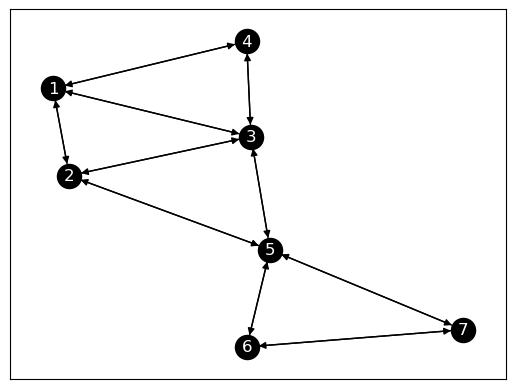

In [91]:
# PHY
# Inputs
Nodes = [
    (1,{"Capacity": 100}),
    (2, {"Capacity": 20}),
    (3, {"Capacity": 200}),
    (4, {"Capacity": 50}),
    (5, {"Capacity": 70}),
    (6, {"Capacity": 60}),
    (7, {"Capacity": 90})
]
Edges = [
    (1, 2, {"Capacity": 135, "Weight": 5}),
    (2, 1, {"Capacity": 94, "Weight": 5}),
    (1, 3, {"Capacity": 86, "Weight": 5}),
    (3, 1, {"Capacity": 54, "Weight": 5}),
    (1, 4, {"Capacity": 100, "Weight": 5}),
    (4, 1, {"Capacity": 100, "Weight": 5}),
    (2, 3, {"Capacity": 50, "Weight": 5}),
    (3, 2, {"Capacity": 50, "Weight": 5}),
    (3, 4, {"Capacity": 1000, "Weight": 5}),
    (4, 3, {"Capacity": 50, "Weight": 5}),
    (2, 5, {"Capacity": 75, "Weight": 5}),
    (5, 2, {"Capacity": 25, "Weight": 5}),
    (3, 5, {"Capacity": 70, "Weight": 5}),
    (5, 3, {"Capacity": 95, "Weight": 5}),
    (7, 5, {"Capacity": 100, "Weight": 5}),
    (5, 7, {"Capacity": 80, "Weight": 5}),
    (5, 6, {"Capacity": 68, "Weight": 5}),
    (6, 5, {"Capacity": 59, "Weight": 5}),
    (7, 6, {"Capacity": 24, "Weight": 5}),
    (6, 7, {"Capacity": 40, "Weight": 5})
]

# Implement
G = nx.DiGraph()
G.add_nodes_from(Nodes)
G.add_edges_from(Edges)

# Visualization
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color='k', edge_color='k', font_color='w', with_labels=True)
# nx.draw(G, pos=plt.circular_layout(G), node_color='r', edge_color='g', with_labels=True)


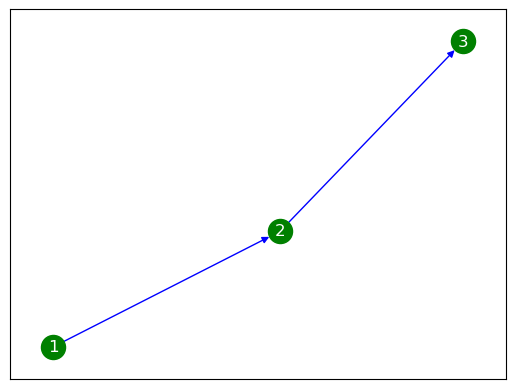

In [92]:
# SFC
# Inputs
NodesS = [
    (1, {"Requirement": 31}),
    (2, {"Requirement": 11}),
    (3, {"Requirement": 92})
]
EdgesS = [
    (1, 2, {"Requirement": 57}),
    (2, 3, {"Requirement": 54})
]

# Implement
GS = nx.DiGraph()
GS.add_nodes_from(NodesS)
GS.add_edges_from(EdgesS)

# Visualization
pos = nx.spring_layout(GS)
nx.draw_networkx(GS, pos=pos, node_color='g', edge_color='b', font_color='w', with_labels=True)

#with open(f"{problemName}.ml", "w+") as f:
    #f.write(str(problem))

## Variables initialization
Fire up our variables!!!
$$ \phi_{i}^{v} = \begin{cases}
1 & \text{when } v \text{ is placed at }i\\
0 & \text{otherwise}
\end{cases} $$

$$ \phi_{ij}^{vw}=\begin{cases}
1 & \text{when }vw\text{ is placed at }ij\\
0 & \text{otherwise}
\end{cases} $$

In [93]:
# Build Node Placement List
phiNode = LpVariable.dicts(
    name="phiNode", 
    indices=(GS.nodes, G.nodes), 
    cat="Binary"
)
phiNode

{1: {1: phiNode_1_1,
  2: phiNode_1_2,
  3: phiNode_1_3,
  4: phiNode_1_4,
  5: phiNode_1_5,
  6: phiNode_1_6,
  7: phiNode_1_7},
 2: {1: phiNode_2_1,
  2: phiNode_2_2,
  3: phiNode_2_3,
  4: phiNode_2_4,
  5: phiNode_2_5,
  6: phiNode_2_6,
  7: phiNode_2_7},
 3: {1: phiNode_3_1,
  2: phiNode_3_2,
  3: phiNode_3_3,
  4: phiNode_3_4,
  5: phiNode_3_5,
  6: phiNode_3_6,
  7: phiNode_3_7}}

In [94]:
# Build Link Placement List
phiLink = LpVariable.dicts(
    name="phiLink",
    indices=(GS.edges, G.edges),
    cat="Binary"
)
phiLink

{(1, 2): {(1, 2): phiLink_(1,_2)_(1,_2),
  (1, 3): phiLink_(1,_2)_(1,_3),
  (1, 4): phiLink_(1,_2)_(1,_4),
  (2, 1): phiLink_(1,_2)_(2,_1),
  (2, 3): phiLink_(1,_2)_(2,_3),
  (2, 5): phiLink_(1,_2)_(2,_5),
  (3, 1): phiLink_(1,_2)_(3,_1),
  (3, 2): phiLink_(1,_2)_(3,_2),
  (3, 4): phiLink_(1,_2)_(3,_4),
  (3, 5): phiLink_(1,_2)_(3,_5),
  (4, 1): phiLink_(1,_2)_(4,_1),
  (4, 3): phiLink_(1,_2)_(4,_3),
  (5, 2): phiLink_(1,_2)_(5,_2),
  (5, 3): phiLink_(1,_2)_(5,_3),
  (5, 7): phiLink_(1,_2)_(5,_7),
  (5, 6): phiLink_(1,_2)_(5,_6),
  (6, 5): phiLink_(1,_2)_(6,_5),
  (6, 7): phiLink_(1,_2)_(6,_7),
  (7, 5): phiLink_(1,_2)_(7,_5),
  (7, 6): phiLink_(1,_2)_(7,_6)},
 (2, 3): {(1, 2): phiLink_(2,_3)_(1,_2),
  (1, 3): phiLink_(2,_3)_(1,_3),
  (1, 4): phiLink_(2,_3)_(1,_4),
  (2, 1): phiLink_(2,_3)_(2,_1),
  (2, 3): phiLink_(2,_3)_(2,_3),
  (2, 5): phiLink_(2,_3)_(2,_5),
  (3, 1): phiLink_(2,_3)_(3,_1),
  (3, 2): phiLink_(2,_3)_(3,_2),
  (3, 4): phiLink_(2,_3)_(3,_4),
  (3, 5): phiLink_(2,_3)_(

## Building Constraints
Build 5 constraints groups.

In [95]:
# clear any left-over data
problem.constraints.clear()

### Constraints Group 1: Node Capacity 
The total requested resources on a single node is under the maximum capacity of that node.
$$ \sum_{v\in\mathcal{N}_{s}}\phi_{i}^{v}.r_{v}\leq a_{i}\qquad\forall i\in\mathcal{N} $$

In [96]:
for node in G.nodes:
    problem += (lpSum(phiNode[nodeS][node] * GS.nodes[nodeS]["Requirement"] for nodeS in GS.nodes) <= G.nodes[node]["Capacity"], f"C1_i{node}")

### Constraints Group 2: Link Capacity
Total requested resouces on a single link is under the maximun capacity of that link
$$ \sum_{vw\in\mathcal{E}_{s}}\phi_{ij}^{vw}.r_{vw}\leq a_{ij}\qquad\forall ij\in\mathcal{E} $$

In [97]:
for edge in G.edges:
    problem += (lpSum(phiLink[edgeS][edge] * GS.edges[edgeS]["Requirement"] for edgeS in GS.edges) <= G.edges[edge]["Capacity"], f"C2_ij{edge}")


### Constraints Group 3: Single VNF in Node
A node can only contain one VNF of a SFC.
$$ \sum_{v\in\mathcal{N}_{s}}\phi_{i}^{v}\leq1\qquad\forall i\in\mathcal{N} $$

In [98]:
for node in G.nodes:
    problem += (lpSum(phiNode[nodeS][node] for nodeS in GS.nodes) <= 1, f"C3_i{node}")

### Constraints Group 4: No VNF is left behind
Every VNF is placed in a Node
$$ \sum_{i\in\mathcal{N}}\phi_{i}^{v}=1\qquad\forall v\in\mathcal{N}_{s} $$

In [99]:
for nodeS in GS.nodes:
    problem += (lpSum(phiNode[nodeS][node] for node in G.nodes) == 1, f"C4_v{nodeS}")

### Constraints Group 5: Flow Conservation
The Flow must be preserved
$$ \sum_{j\in\mathcal{N}}\phi_{ij}^{vw}-\sum_{j\in\mathcal{N}}\phi_{ji}^{vw}=\phi_{i}^{v}-\phi_{i}^{w}\qquad\forall i\in\mathcal{N},\forall vw\in\mathcal{E}_{s} $$

In [100]:
for i in G.nodes:
    for vw in GS.edges:
        problem += ((lpSum(phiLink[vw].get((i, j)) for j in G.nodes) - lpSum(phiLink[vw].get((j, i)) for j in G.nodes)) == phiNode[vw[0]][i] - phiNode[vw[1]][i], f"C5_i{i}_vw{vw}")


### Optional: Force put a VNF at a fixed Node
We can forcefully place a VNF in a node of PHY network.
$$ \phi_{i}^{v} = 1 $$

In [101]:
# Force starts at Node 4
# problem += phiNode[1][4] == 1
# Force ends at Node 7
# problem += phiNode[5][7] == 1

## Building objective function: Use minimum edges and nodes
Minimize the number of needed edges and nodes
$$ \min\left(\phi_{\mathcal{G}}^{\mathcal{G}_{s}}\right)=\min\left(\sum_{i\in\mathcal{N}}\sum_{v\in\mathcal{N}_{s}}\phi_{i}^{v}+\sum_{ij\in\mathcal{E}}\sum_{vw\in\mathcal{E}_{s}}\phi_{ij}^{vw}\right) $$

In [102]:
problem += lpSum(lpSum(phiNode[v][i] for v in GS.nodes) for i in G.nodes) + lpSum(lpSum(phiLink[vw][ij] for vw in GS.edges) for ij in G.edges)

## Confirm before start
Double-check the whole inputs. (it's in the generated file)

In [103]:
problem.writeLP(filename=f"{problemName}.lp")

[phiLink_(1,_2)_(1,_2),
 phiLink_(1,_2)_(1,_3),
 phiLink_(1,_2)_(1,_4),
 phiLink_(1,_2)_(2,_1),
 phiLink_(1,_2)_(2,_3),
 phiLink_(1,_2)_(2,_5),
 phiLink_(1,_2)_(3,_1),
 phiLink_(1,_2)_(3,_2),
 phiLink_(1,_2)_(3,_4),
 phiLink_(1,_2)_(3,_5),
 phiLink_(1,_2)_(4,_1),
 phiLink_(1,_2)_(4,_3),
 phiLink_(1,_2)_(5,_2),
 phiLink_(1,_2)_(5,_3),
 phiLink_(1,_2)_(5,_6),
 phiLink_(1,_2)_(5,_7),
 phiLink_(1,_2)_(6,_5),
 phiLink_(1,_2)_(6,_7),
 phiLink_(1,_2)_(7,_5),
 phiLink_(1,_2)_(7,_6),
 phiLink_(2,_3)_(1,_2),
 phiLink_(2,_3)_(1,_3),
 phiLink_(2,_3)_(1,_4),
 phiLink_(2,_3)_(2,_1),
 phiLink_(2,_3)_(2,_3),
 phiLink_(2,_3)_(2,_5),
 phiLink_(2,_3)_(3,_1),
 phiLink_(2,_3)_(3,_2),
 phiLink_(2,_3)_(3,_4),
 phiLink_(2,_3)_(3,_5),
 phiLink_(2,_3)_(4,_1),
 phiLink_(2,_3)_(4,_3),
 phiLink_(2,_3)_(5,_2),
 phiLink_(2,_3)_(5,_3),
 phiLink_(2,_3)_(5,_6),
 phiLink_(2,_3)_(5,_7),
 phiLink_(2,_3)_(6,_5),
 phiLink_(2,_3)_(6,_7),
 phiLink_(2,_3)_(7,_5),
 phiLink_(2,_3)_(7,_6),
 phiNode_1_1,
 phiNode_1_2,
 phiNode_1_3

## Let's the show begins
Fire the solver and wait for results. `Optimal` means that we found the solution. `Infeasible` means that we cannot solve the problem.

In [104]:
solver = pulp.PULP_CBC_CMD(msg=True, warmStart=True) # GNNN/RL/ML
status = problem.solve(solver)
LpStatus[status]

'Optimal'

v1 -> i7
v2 -> i5
v3 -> i3
vw(1, 2) -> ij(7, 5)
vw(2, 3) -> ij(5, 3)


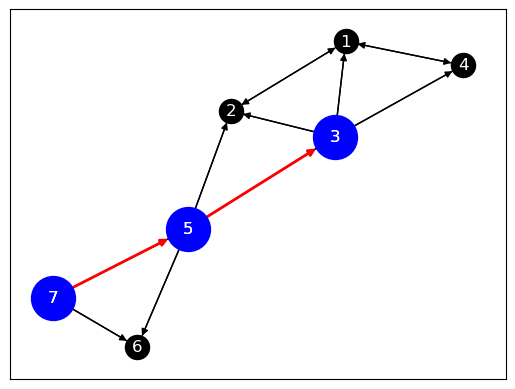

In [105]:
selectedNodes = list()
for v in GS.nodes:
    for i in G.nodes:
        if (value(phiNode[v][i])):
            print(f"v{v} -> i{i}")
            selectedNodes.append(i)

selectedLinks = list()
for vw in GS.edges:
    for ij in G.edges:
        if (value(phiLink[vw][ij])):
            print(f"vw{vw} -> ij{ij}")
            selectedLinks.append(ij)

# GG = G.subgraph(selectedNodes)
GG = G.edge_subgraph(selectedLinks)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color='k', edge_color='k',
                 font_color='w', with_labels=True)
nx.draw_networkx(GG, pos=pos, node_color='b', edge_color='r',
                 font_color='w', with_labels=True, node_size=1000.0, width=2.0)
